# WINE RECOGNITION

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
pio.templates
from scipy import stats
from scipy.stats import skew,norm

In [30]:
from sklearn.datasets import load_wine
load_wine=load_wine()
x=load_wine.data
y=load_wine.target
data=pd.DataFrame(x,columns=load_wine.feature_names)
data['class']=y
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [31]:
print(load_wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [32]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


0.10743112358094281
-1.3227866741571241


C:\Users\soham\AppData\Local\Temp\ipykernel_7824\2699048187.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['class'],fit=norm)


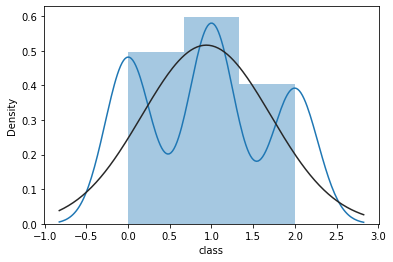

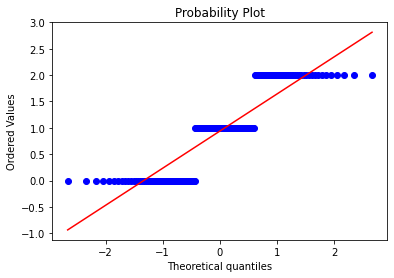

In [34]:
print(data['class'].skew())
print(data['class'].kurt())
sns.distplot(data['class'],fit=norm)
fig=plt.figure()
res=stats.probplot(data['class'],plot=plt)
plt.show()

In [35]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop('class',axis=1),data['class'],test_size=0.2,random_state=0)

In [47]:
lr.fit(x_train,y_train)

LinearRegression()

In [54]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(142, 13)
(36, 13)
(142,)
(36,)


In [55]:
print(y_test)

54     0
151    2
63     1
55     0
123    1
121    1
7      0
160    2
106    1
90     1
141    2
146    2
5      0
98     1
168    2
80     1
33     0
18     0
61     1
51     0
66     1
37     0
4      0
104    1
60     1
111    1
126    1
86     1
112    1
164    2
26     0
56     0
129    1
45     0
8      0
44     0
Name: class, dtype: int32


In [61]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,(lr.predict(x_test)))
rmse=np.sqrt(mse)
print(rmse)

0.34534983995976665


In [65]:
print(y_test)

54     0
151    2
63     1
55     0
123    1
121    1
7      0
160    2
106    1
90     1
141    2
146    2
5      0
98     1
168    2
80     1
33     0
18     0
61     1
51     0
66     1
37     0
4      0
104    1
60     1
111    1
126    1
86     1
112    1
164    2
26     0
56     0
129    1
45     0
8      0
44     0
Name: class, dtype: int32


In [64]:
print(np.round(lr.predict(x_test)))

[ 0.  2.  1.  1.  1. -0. -0.  2.  1.  1.  1.  2. -0.  0.  2.  1.  0. -0.
  2. -0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  2. -0.  0.  1.  0.  0.  0.]


In [66]:
print((lr.predict(x_test)))

[ 0.13456913  2.08929439  0.87396631  0.50083299  0.95854797 -0.14054782
 -0.08644665  2.16604925  0.72646695  1.11990948  1.4686175   2.06577711
 -0.19554484  0.42583092  1.88579133  0.8897033   0.07965492 -0.47751579
  1.50868655 -0.15131414  0.47968569  0.42420933  0.58625156  0.69713137
  1.22992051  1.07211561  0.74857703  1.1994027   0.76278552  1.99673191
 -0.071002    0.24293131  1.21037096  0.27025637  0.04196499  0.3026773 ]
